## Линейная регрессия. Практика

В этом задании Вам предстоит применить на практике алгоритм линейной регрессии. В этом задании **запрещается** менять уже написанный код. Вы можете дописывать только свой код в указанных ячейках. Если ячейка пустая, вы **можете** создать дополнительные ячейки.

In [ ]:
import re

from datetime import datetime

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 40)

import matplotlib.pyplot as plt

# %matplotlib inline

import seaborn as sns

sns.set()
sns.set_style("whitegrid")

Мы будем работать с датасетом доставки готовой еды. В этой практике мы будем решать задачу **ETA (estimated time of arrival)** – предсказание времени доставки. Датасет содержит в себе информацию о нескольких поездках курьеров. Каждая поездка описывается следующим набором признаков:

- ID – уникальный идентификатор поездки;
- Delivery_person_ID – идентификатор курьера;
- Delivery_person_Age – возраст курьера;
- Delivery_person_Ratings – рейтинг курьера;
- Restaurant_latitude, Restaurant_longitude – координаты ресторана: широта и долгота;
- Delivery_location_latitude, Delivery_location_longitude – координаты клиента: широта и долгота;
- Order_Date – дата доставки;
- Time_Orderd – время, когда был принят заказ;
- Time_Order_picked – время, когда заказ был передан курьеру;
- Weather conditions – погодные условия;
- Road_traffic_density – плотность автомобилей на дороге;
- Vehicle_condition – состояние транспорта курьера;
- Type_of_order – тип заказа;
- Type_of_vehicle – вид транспорта курьера;
- multiple_deliveries – количество одновременных заказов у курьера;
- Festival – был ли заказ сделан с учетом промокода;
- City – регион доставки.

Ваша задача предсказать время доставки заказа – столбец Time_taken.

In [ ]:
df = pd.read_csv('eta-prediction-data.csv.gz', compression='gzip')

df.rename(columns={'Time_taken (min)': 'Time_taken'}, inplace=True)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')

df['Road_traffic_density'] = pd.Categorical(
    df['Road_traffic_density'],
    categories=['Low', 'Medium', 'High', 'Jam'],
    ordered=True,
)

df['Festival'] = df['Festival'].fillna('No') == 'Yes'

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,False,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,False,Metropolitian,33.0
2,0x20f7,BANGRES18DEL01,37.0,4.4,12.913041,77.683237,12.953041,77.723237,2022-03-19,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,False,Metropolitian,42.0
3,0x7804,HYDRES13DEL02,28.0,4.9,17.431477,78.400350,17.451477,78.420350,2022-03-07,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.0,False,Urban,19.0
4,0x7faf,RANCHIRES07DEL01,37.0,4.6,23.359407,85.325055,23.429407,85.395055,2022-03-18,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.0,False,Metropolitian,25.0


### EDA (2 балла)

Выполните разведочный анализ данных. Для этого:
- Выведите размер таблицы;
- Посчитайте количество пропущенных значений.

Подумайте, какие столбцы вы хотите заполнить и какими значениями, а какие вообще не планируете использовать в своей модели.

In [ ]:
# место для вашего кода

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                           1200
Time_taken                        0
dtype: int64

Обратите внимание на значения в столбце `City`. Предлагается выполнить для столбца следующую предобработку данных:
- Значение `Semi-Urban` перевести в `Urban`;
- Пропущенные значения заполнить самым популярным значением.

Не забудьте указать категориальный тип у столбца `City`.

In [ ]:
# место для вашего кода

City
Metropolitian    35293
Urban            10300
Name: count, dtype: int64

Вычислите ID ресторана (`Restaurant_ID`) и добавьте его в исходный датасет.

In [ ]:
# место для вашего кода

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Restaurant_ID
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,False,Urban,24.0,0
1,0x3b60,INDORES13DEL01,35.0,4.2,22.745049,75.892471,22.855049,76.002471,2022-04-02,17:20,17:30,Stormy,Medium,2,Meal,scooter,1.0,False,Metropolitian,35.0,0
2,0x19d5,INDORES13DEL01,33.0,4.4,22.745049,75.892471,22.785049,75.932471,2022-04-01,12:40,12:50,Sandstorms,High,0,Meal,motorcycle,1.0,False,Urban,48.0,0
3,0x6e17,INDORES13DEL01,25.0,5.0,22.745049,75.892471,22.755049,75.902471,2022-03-21,8:35,8:50,Sandstorms,Low,1,Snack,scooter,1.0,False,Urban,18.0,0
4,0x532a,INDORES13DEL01,31.0,4.3,22.745049,75.892471,22.855049,76.002471,2022-03-04,18:30,18:35,Windy,Medium,0,Meal,motorcycle,1.0,False,Metropolitian,36.0,0


Добавьте в датасет столбец `Time_Order_picked_Hour` – час, когда заказ был принят в доставку.

In [ ]:
# место для вашего кода

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Restaurant_ID,Time_Order_picked_Hour
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,False,Urban,24.0,0,11
1,0x3b60,INDORES13DEL01,35.0,4.2,22.745049,75.892471,22.855049,76.002471,2022-04-02,17:20,17:30,Stormy,Medium,2,Meal,scooter,1.0,False,Metropolitian,35.0,0,17
2,0x19d5,INDORES13DEL01,33.0,4.4,22.745049,75.892471,22.785049,75.932471,2022-04-01,12:40,12:50,Sandstorms,High,0,Meal,motorcycle,1.0,False,Urban,48.0,0,12
3,0x6e17,INDORES13DEL01,25.0,5.0,22.745049,75.892471,22.755049,75.902471,2022-03-21,8:35,8:50,Sandstorms,Low,1,Snack,scooter,1.0,False,Urban,18.0,0,8
4,0x532a,INDORES13DEL01,31.0,4.3,22.745049,75.892471,22.855049,76.002471,2022-03-04,18:30,18:35,Windy,Medium,0,Meal,motorcycle,1.0,False,Metropolitian,36.0,0,18


Постройте два графика `bar` (или `hist`):
1. Зависимость количества заказов от часа, когда заказ был принят курьером;
2. Зависимость среднего времени доставки от часа, когда заказ был принят курьером.

Какие зависимости вы увидели? Сделайте **выводы** и **напишите** их в комментариях.

In [ ]:
# место для вашего кода

Постройте график `heatmap`, который показывает зависимость среднего времени доставки от:
- Количества заказов от часа, когда заказ был принят курьером;
- Состояния трафика на дороге.

Какие зависимости вы увидели? Сделайте **выводы** и **напишите** их в комментариях.

In [ ]:
# место для вашего кода

Постройте график `bar` (или `hist`) зависимости среднего времени доставки от состояния погоды.

Какие зависимости вы увидели? Сделайте **выводы** и **напишите** их в комментариях.

In [ ]:
# место для вашего кода

Постройте график `bar` (или `hist`) зависимости среднего времени доставки от возраста курьера.

Какие зависимости вы увидели? Сделайте **выводы** и **напишите** их в комментариях.

In [ ]:
# место для вашего кода

Постройте два графика:
- зависимость количества заказов от дня, когда был совершен заказ;
- зависимость среднего времени заказа от дня, когда был совершен заказ.

Какие зависимости вы увидели? Сделайте **выводы** и **напишите** их в комментариях.

In [ ]:
# место для вашего кода

**Продолжите** разведочный анализ данных, постарайтесь найти как можно больше инсайтов в данных.

In [ ]:
# место для вашего кода

### Подготовка данных (1 балл)

**Приведите** все столбцы к нужному типу данных. Заполните необходимые пропуски.

**Добавьте** столбец `distance` – евклидово расстояние между `restaurant` и `delivery`.

In [ ]:
# место для вашего кода

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Restaurant_ID,Time_Order_picked_Hour,distance
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30,11:45,Sunny,High,2,Snack,motorcycle,0,False,Urban,24.0,0,11,0.0008
1,0x3b60,INDORES13DEL01,35.0,4.2,22.745049,75.892471,22.855049,76.002471,2022-04-02,17:20,17:30,Stormy,Medium,2,Meal,scooter,1,False,Metropolitian,35.0,0,17,0.0242
2,0x19d5,INDORES13DEL01,33.0,4.4,22.745049,75.892471,22.785049,75.932471,2022-04-01,12:40,12:50,Sandstorms,High,0,Meal,motorcycle,1,False,Urban,48.0,0,12,0.0032
3,0x6e17,INDORES13DEL01,25.0,5.0,22.745049,75.892471,22.755049,75.902471,2022-03-21,8:35,8:50,Sandstorms,Low,1,Snack,scooter,1,False,Urban,18.0,0,8,0.0002
4,0x532a,INDORES13DEL01,31.0,4.3,22.745049,75.892471,22.855049,76.002471,2022-03-04,18:30,18:35,Windy,Medium,0,Meal,motorcycle,1,False,Metropolitian,36.0,0,18,0.0242


Разбейте выборку на обучающую и тестовую. **Внимательно** подумайте, как сделать это правильно. Помните, что разбиение на обучающую и валидационную выборку должно **моделировать процесс применения** модели.

Доля валидационного множества должна быть не менее 13%.

In [ ]:
# место для вашего кода

train_idx = None
valid_idx = None

 Качество нашей модели будем оценивать с помощью метрик `mae` и `mape`.

In [ ]:
target = 'Time_taken'

### Бейзлайн модель \[итерация 1\] (1 балл)

Когда мы знакомились с алгоритмом линейной регрессии, мы немного говорили о наилучшем константном решении. Давайте построим первый бейзлайн для решения нашей задачи. **Вспомните**, какое наилучшее константное решение для метрики `mae`.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# место для вашего кода

best_const = None

In [ ]:
score = mean_absolute_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f минут' % score

In [ ]:
score = mean_absolute_percentage_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f%%' % (100 * score)

### Бейзлайн модель \[итерация 2\] (1 балл)

Улучшите предыдущий бейзлайн, **НЕ используя** модели машинного обучения.

<details>
<summary>Подсказка</summary>

Найдите наилучшее константное решение в некоторых разрезах данных.
</detailes>

In [ ]:
# место для вашего кода

In [ ]:
score = mean_absolute_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f минут' % score

In [ ]:
score = mean_absolute_percentage_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f%%' % (100 * score)

### Обучаем модель \[итерация 1\] (1 балл)

Теперь попробуем обучить модель линейной регрессии:
- Выполните предобработку численных признаков;
- Закодируйте категориальные переменные.

Постройте **график** важности признаков.

Для удобства написания кода можете воспользоваться [`Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) и [`ColumnTransformer`](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
features_num = [
    'multiple_deliveries',
    'distance',
]

features_cat = [
    'Weather conditions',
    'Road_traffic_density',
    'City',
]

target = 'Time_taken'

In [ ]:
# место для вашего кода

model = None

In [ ]:
score = mean_absolute_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f минут' % score

In [ ]:
score = mean_absolute_percentage_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f%%' % (100 * score)

bias = 25.711502197134227


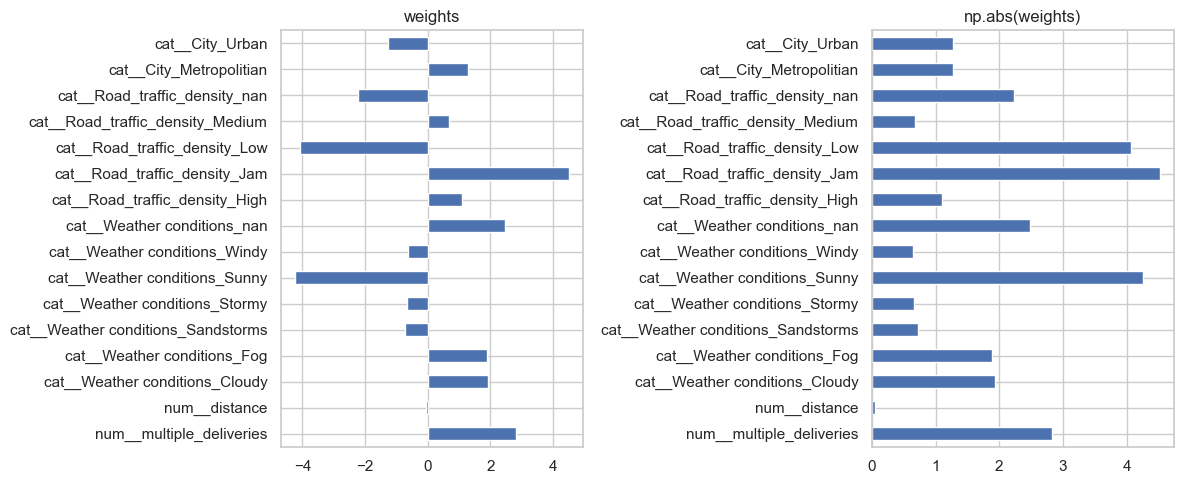

In [ ]:
def plot_importances(model, figsize=(12, 8), keep_zero=True):
    '''
    - model: Pipeline – входная линейная модель
    - figsize: Tuple[int, int] – размер изображения
    - keep_zero: bool – отрисовывать признаки с весами равными нулю
    '''
    # место для вашего кода


# можете менять аргумент figsize, чтобы график выглядел красиво

plot_importances(model, figsize=(12, 5))

### Обучаем модель \[итерация 2\] (1 балл)

Попробуйте добавить признаки, связанные со временем, когда был оформлен заказ. Еще раз посмотрите в EDA, подумайте, какие признаки могут быть полезными.

In [ ]:
# место для вашего кода

In [ ]:
score = mean_absolute_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f минут' % score

In [ ]:
score = mean_absolute_percentage_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f%%' % (100 * score)

In [ ]:
# можете менять аргумент figsize, чтобы график выглядел красиво

plot_importances(model, figsize=(12, 9))

### Обучаем модель \[итерация 3\] (1 балл)

Попробуйте добавить признаки, связанные c курьером. **Придумайте**, какие признаки можно добавить на основе `Delivery_person_ID`.

Попробуйте добавить возраст курьера двумя вариантами:
- Как числовой признак;
- Как категориальный признак (разбейте его на бакеты), см. `np.digitize`.

Как правильно выбирать бакеты для этой задачи? Какой из этих вариантов работает лучше?

**Не удаляйте** признаки с предыдущего этапа, если они улучшили качество модели.

In [ ]:
# место для вашего кода

In [ ]:
score = mean_absolute_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f минут' % score

In [ ]:
score = mean_absolute_percentage_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f%%' % (100 * score)

In [ ]:
# можете менять аргумент figsize, чтобы график выглядел красиво

plot_importances(model, figsize=(12, 12))

### Обучаем модель \[итерация 4\] (1 балл)

Полученная модель использует уже большое число признаков. Примените регуляризацию для уменьшения количества признаков в модели **без потери качества**.

In [ ]:
# место для вашего кода

In [ ]:
score = mean_absolute_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f минут' % score

In [ ]:
score = mean_absolute_percentage_error(y_true, y_pred)

'В среднем мы ошибаемся на %.2f%%' % (100 * score)

In [ ]:
# можете менять аргумент figsize, чтобы график выглядел красиво

plot_importances(model, figsize=(12, 8), keep_zero=False)

### Анализ остатков (1 балл)

Осталось проанализировать остатки лучшей модели. Постройте:
- Распределение остатков модели;
- График зависимости остатков от истинного предсказания.

Напишите выводы, которые вы сделали из полученных графиков. Предложите возможное решение, как улучшить проблему перепредсказаний и недопредсказаний.

In [ ]:
# место для вашего кода